In [22]:
"""
==========================================
Fuzzy Control Systems: The Tipping Problem
==========================================

The 'tipping problem' is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.

If you're new to the world of fuzzy control systems, you might want
to check out the `Fuzzy Control Primer
<../userguide/fuzzy_control_primer.html>`_
before reading through this worked example.

The Tipping Problem
-------------------

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10.  You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

* Antecednets (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
* Rules
   - IF the *service* was good  *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.


Creating the Tipping Controller Using the skfuzzy control API
-------------------------------------------------------------

We can use the `skfuzzy` control system API to model this. First, let's install scikit-fuzzy package 
"""



"\n==========================================\nFuzzy Control Systems: The Tipping Problem\n==========================================\n\nThe 'tipping problem' is commonly used to illustrate the power of fuzzy logic\nprinciples to generate complex behavior from a compact, intuitive set of\nexpert rules.\n\nIf you're new to the world of fuzzy control systems, you might want\nto check out the `Fuzzy Control Primer\n<../userguide/fuzzy_control_primer.html>`_\nbefore reading through this worked example.\n\nThe Tipping Problem\n-------------------\n\nLet's create a fuzzy control system which models how you might choose to tip\nat a restaurant.  When tipping, you consider the service and food quality,\nrated between 0 and 10.  You use this to leave a tip of between 0 and 25%.\n\nWe would formulate this problem as:\n\n* Antecednets (Inputs)\n   - `service`\n      * Universe (ie, crisp value range): How good was the service of the wait\n        staff, on a scale of 0 to 10?\n      * Fuzzy set (

In [53]:
pip install -U scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [60]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
temp = ctrl.Antecedent(np.arange(0, 111, 1), 'temp')
cover = ctrl.Antecedent(np.arange(0, 101, 1), 'cover')
speed = ctrl.Consequent(np.arange(0, 101, 1), 'speed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# service.automf(3)

temp['freezing'] = fuzz.trapmf(temp.universe, [0, 0, 30, 50])
temp['cool'] = fuzz.trimf(temp.universe, [30, 50, 70])
temp['warm'] = fuzz.trimf(temp.universe, [50, 70, 90])
temp['hot'] = fuzz.trapmf(temp.universe, [70, 90, 110, 110])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
cover['sunny'] = fuzz.trapmf(cover.universe, [0, 0, 20, 40])
cover['partly'] = fuzz.trimf(cover.universe, [20, 50, 80])
cover['overcast'] = fuzz.trapmf(cover.universe, [60, 80, 100, 100])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
speed['slow'] = fuzz.trapmf(speed.universe, [0, 0, 25, 75])
speed['fast'] = fuzz.trapmf(speed.universe, [25, 75, 100, 100])


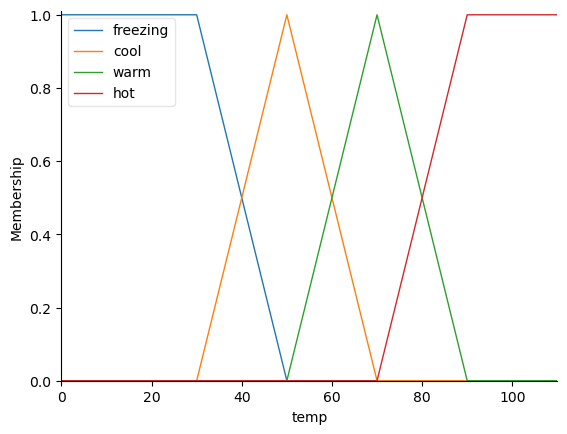

In [61]:
#To help understand what the membership looks like, use the ``view`` methods.
# quality['decent'].view()
temp.view()

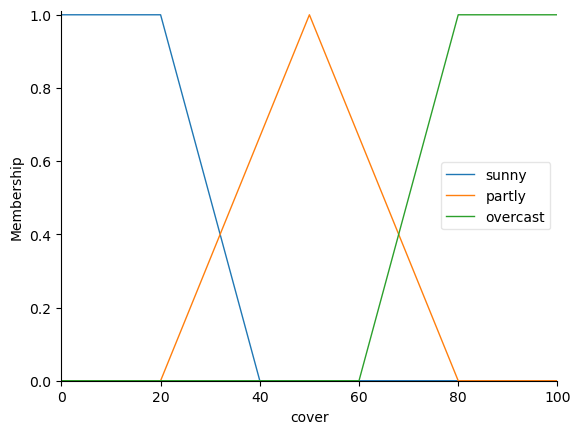

In [62]:
cover.view()

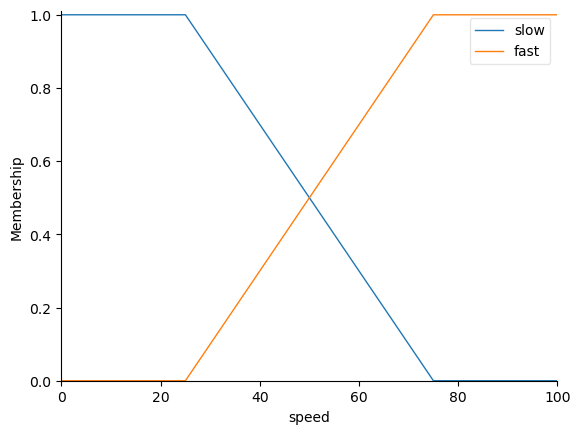

In [63]:
speed.view()

In [64]:
'''Fuzzy rules
-----------

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If Sunny and warm -> fast
2. If cloudy and cool -> slow

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.

'''

'Fuzzy rules\n-----------\n\nNow, to make these triangles useful, we define the *fuzzy relationship*\nbetween input and output variables. For the purposes of our example, consider\nthree simple rules:\n\n1. If Sunny and warm -> fast\n2. If cloudy and cool -> slow\n\nMost people would agree on these rules, but the rules are fuzzy. Mapping the\nimprecise rules into a defined, actionable tip is a challenge. This is the\nkind of task at which fuzzy logic excels.\n\n'

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

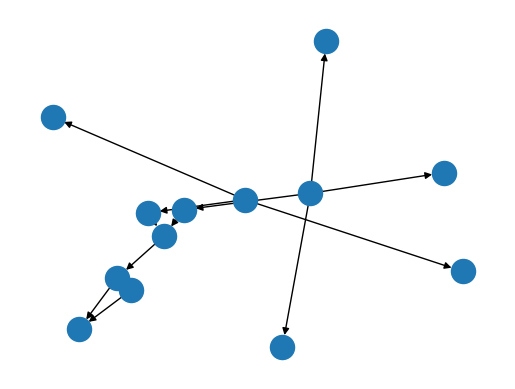

In [81]:
rule1 = ctrl.Rule(temp['warm'] & cover['sunny'], speed['fast'])
rule2 = ctrl.Rule(temp['cool'] & cover['partly'], speed['slow'])

rule2.view()

In [82]:
'''Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via:
'''

'Control System Creation and Simulation\n---------------------------------------\n\nNow that we have our rules defined, we can simply create a control system\nvia:\n'

In [83]:
speeding_ctrl = ctrl.ControlSystem([rule1, rule2])

In [84]:
'''In order to simulate this control system, we will create a ControlSystemSimulation. 
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for 
Travis at the cafe because the inputs would be different.'''

'In order to simulate this control system, we will create a ControlSystemSimulation. \nThink of this object representing our controller applied to a specific set of cirucmstances. \nFor tipping, this might be tipping Sharon at the local brew-pub. \nWe would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for \nTravis at the cafe because the inputs would be different.'

In [85]:
speeding = ctrl.ControlSystemSimulation(speeding_ctrl)

In [86]:
'''We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
'''

'We can now simulate our control system by simply specifying the inputs\nand calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10\nand the service 9.8 of 10.\n'

In [87]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
# tipping.input['quality'] = 5.0
# tipping.input['service'] = 8.0

# # Crunch the numbers
# tipping.compute()

speeding.input['temp'] = 65
speeding.input['cover'] = 25

speeding.compute()

65.03028344048694


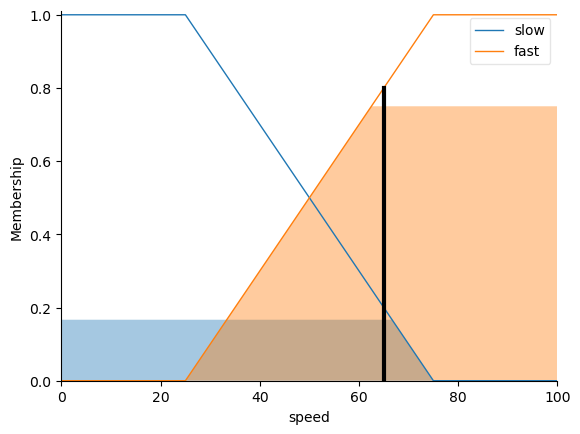

In [88]:
print(speeding.output['speed'])
speed.view(sim=speeding)